In [17]:
import sklearn
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import pickle
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb


import joblib

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_pickle("./data.pkl")

In [13]:
target_names = ["titel", "bouwjaar", "kilometer_stand", "vermogen", "is_handgeschakeld", "is_benzine", "upload_datum", "apk"]

numeric_features = ['bouwjaar', "kilometer_stand", "vermogen", "upload_datum", "apk"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('text',  CountVectorizer(), 'titel')],
    remainder='passthrough')

In [14]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X_train = df_train.drop(['prijs'], axis=1)
y_train = df_train[['prijs']]

X_test = df_test.drop(['prijs'], axis=1)
y_test = df_test[['prijs']]['prijs']
X_test

,titel,bouwjaar,kilometer_stand,vermogen,is_handgeschakeld,is_benzine,upload_datum,apk
357,fiat punto grande active deurs rijklaarprijs k...,2009,141940.0,67,1.0,1,16,147
851,fiat grande punto dynamic,2007,179086.0,65,1.0,1,10,163
780,fiat grande punto dynamic goed onderhouden,2006,160886.0,65,1.0,1,2,147
268,fiat grande punto actual airco deurs,2010,185314.0,84,1.0,0,25,600
41,fiat grande punto active,2007,232477.0,75,1.0,0,13,297
...,...,...,...,...,...,...,...,...
817,fiat grande punto dynamic airco clima cruise c...,2008,65513.0,77,1.0,1,5,57
26,fiat grande punto edizione cool deurs garantie,2006,117271.0,67,1.0,1,12,147
92,fiat grande punto dynamic airco cruise auto,2008,172488.0,77,1.0,1,18,169
11,fiat grande punto active,2007,238443.0,75,1.0,0,11,147


In [15]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [16]:
def evaluate_model(y_test, y_pred):
    print("Mean absolute error:\t", int(mean_absolute_error(y_test, y_pred)))
    print("Mean squared error:\t", int(mean_squared_error(y_test, y_pred)))

In [20]:
y_test

357    4250.0
851    2950.0
780    2494.0
268    2950.0
41     1450.0
        ...  
817    4100.0
26     3400.0
92     2450.0
11     1749.0
358    5500.0
Name: prijs, Length: 180, dtype: float64

In [25]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)


xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mae

[18:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


520.3046312120225

[18:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


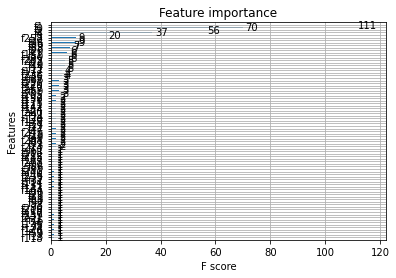

In [27]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

xgb.plot_importance(xgb_model)